In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('fivethirtyeight')

In [80]:
!apt install fonts-nanum

import matplotlib as mpl
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fontname = font.get_name()
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


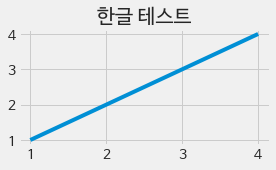

In [81]:
plt.figure(figsize = (4,2))
plt.plot([1,2,3,4],[1,2,3,4])
plt.title('한글 테스트')
plt.show()

In [82]:
!git clone https://github.com/BigcontestParrot2020/csv.git

fatal: destination path 'csv' already exists and is not an empty directory.


In [83]:
data = pd.read_csv('/content/csv/0924_ver.csv', encoding = 'utf-8', index_col=1).iloc[:,1:]

In [84]:
data['방송시간'] = pd.to_datetime(data.index).strftime('%H:%M')
data['방송시'] = pd.to_datetime(data.index).strftime('%H')
data['방송요일'] = pd.to_datetime(data.index).strftime('%A')
data['판매횟수'] = data.취급액/data.판매단가

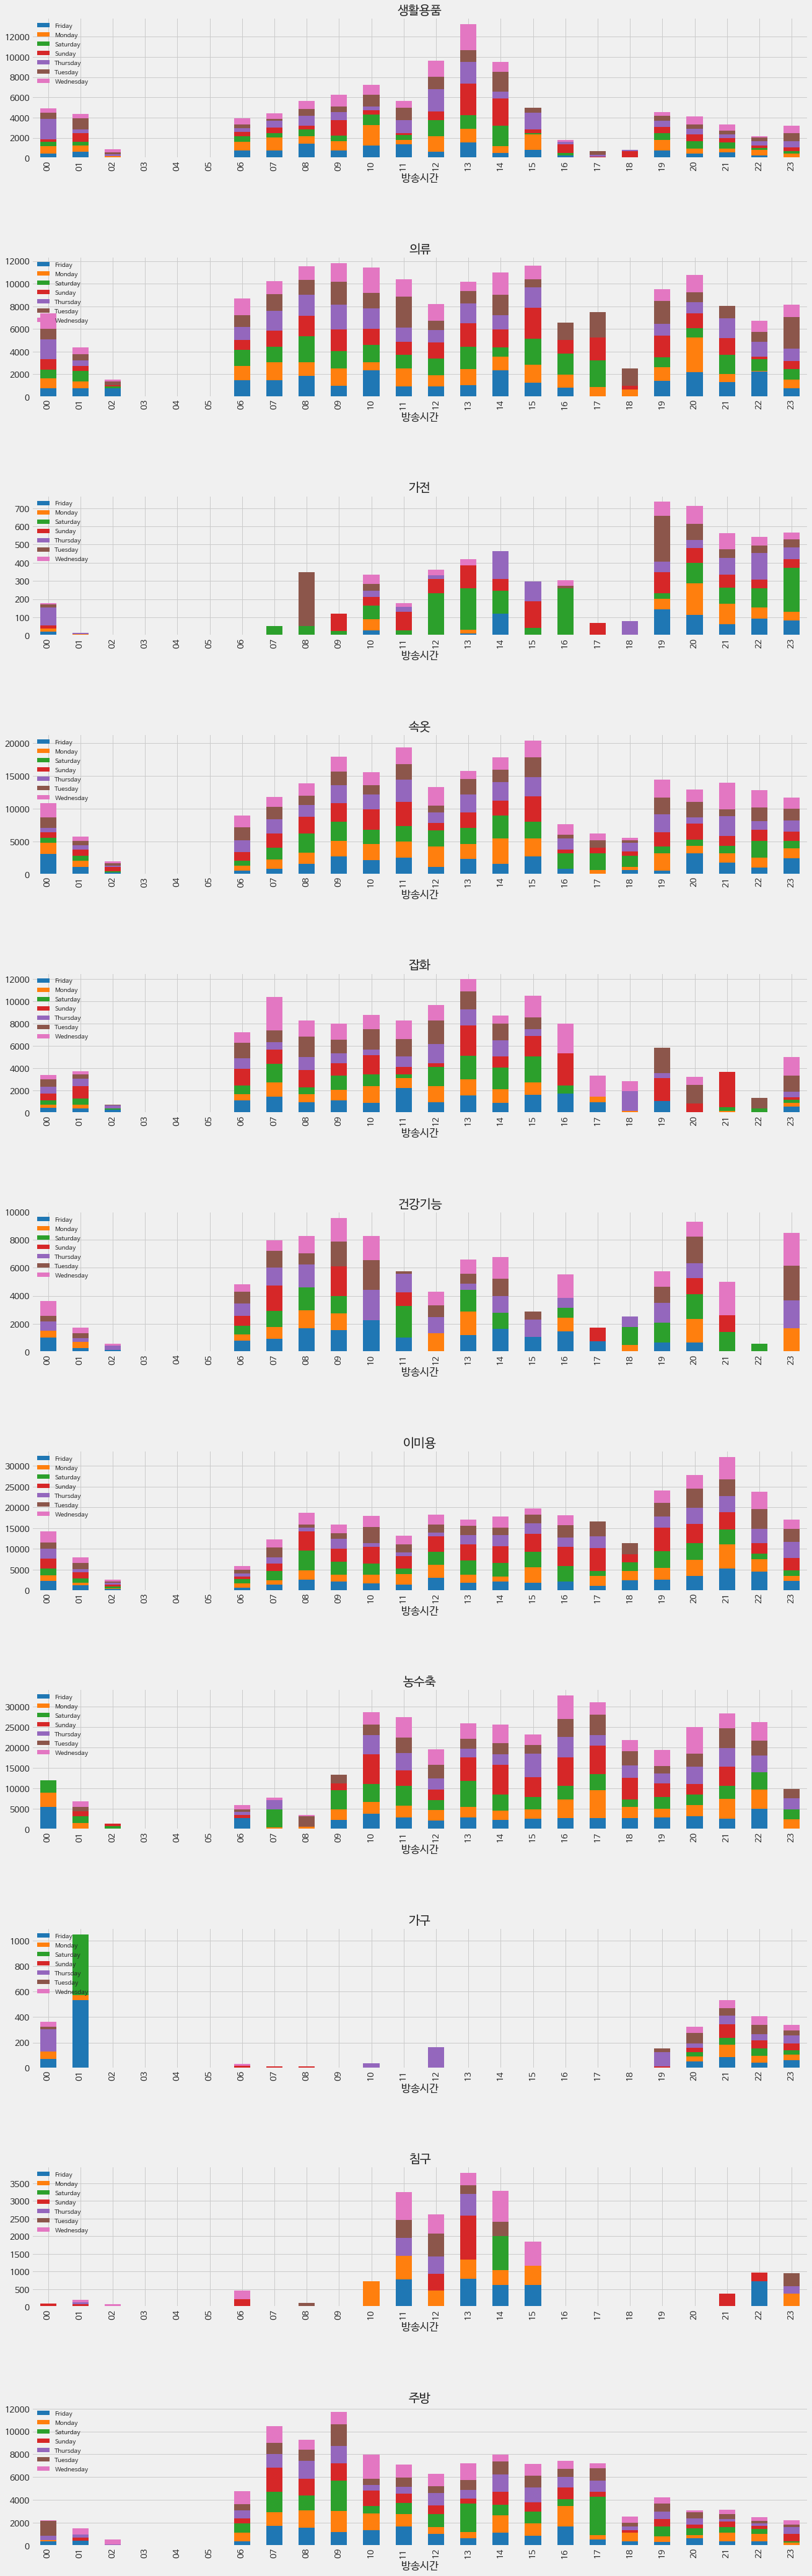

In [115]:
features = set(data.상품군)
colors = list(plt.cm.tab10(np.arange(10))) + ["crimson", "indigo"]

fig, ax = plt.subplots(len(features), 1, figsize = (20,70))
plt.subplots_adjust(hspace= 0.7)
for i, g in enumerate(features):
    plot_df = data[data.상품군 == g]
    plot_df = plot_df.groupby(['방송요일','방송시간']).mean()['판매횟수'].to_frame()
    plot_df = plot_df.unstack(0).fillna(0)
    plot_df.index = pd.to_datetime(plot_df.index)
    plot_df = plot_df.resample('1H').sum()
    plot_df.index = plot_df.index.strftime('%H')
    plot_df = plot_df.droplevel(0, axis=1)
    plot_df.plot.bar(stacked = True, ax = ax[i], color = colors)
    ax[i].set_title(g, fontsize = 20)
    ax[i].legend(loc=2, prop={'size': 10})
plt.grid(axis = 'x')